# Import the packages

In [2]:
pip install fastai==1.0.58

     -------------------------------------- 236.7/236.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 12.2/12.2 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 480.9/480.9 kB 5.0 MB/s eta 0:00:00
     -------------------------------------- 172.3/172.3 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 3.7 MB/s eta 0:00:00
  Created wheel for nvidia

In [2]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

ImportError: cannot import name 'Iterable' from 'collections' (C:\Users\HI\anaconda3\lib\collections\__init__.py)

# Convert the dataset into Imagenet style

In [4]:
DATASET_PATH = 'Fruits_Dataset/train'

In [5]:
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [6]:
class_names

['Tomato_Cherry_Red',
 'Tomato_Yellow',
 'Tomato_Maroon',
 'Walnut',
 'Tomato_4',
 'Tomato_3']

In [7]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)
    

In [8]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [9]:
df.head()

,name,label
0,Fruits_Dataset/train/Tomato_Cherry_Red/112_100_jpg.rf.75a1c69cb30b24bc48d0e363ccd94690.jpg,0
1,Fruits_Dataset/train/Tomato_Cherry_Red/r_304_100_jpg.rf.af4142eb26a62cbbf33945ccca373427.jpg,0
2,Fruits_Dataset/train/Tomato_Cherry_Red/r_254_100_jpg.rf.cae00dd300c82748dc2e0c1bcec97c1e.jpg,0
3,Fruits_Dataset/train/Tomato_Cherry_Red/r_6_100_jpg.rf.54a54c0213bc81f1236849f70325359b.jpg,0
4,Fruits_Dataset/train/Tomato_Cherry_Red/10_100_jpg.rf.a1bead7697dc516b8c3ec685670ca813.jpg,0


In [10]:
df.tail()

,name,label
2904,Fruits_Dataset/train/Tomato_3/r_158_100_jpg.rf.1aeb671e1f918ece8962aa6934afed15.jpg,5
2905,Fruits_Dataset/train/Tomato_3/r_88_100_jpg.rf.0a892babb1ca702d83e98d22e67ad9ce.jpg,5
2906,Fruits_Dataset/train/Tomato_3/r_173_100_jpg.rf.91bb7e0798418b32c905f42b70b1636d.jpg,5
2907,Fruits_Dataset/train/Tomato_3/r2_81_100_jpg.rf.ddb0ff81e9c053ae534ad060291db30d.jpg,5
2908,Fruits_Dataset/train/Tomato_3/r2_261_100_jpg.rf.af61d1a60c5d6a4c39129307ab9bdedf.jpg,5


In [11]:
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)

# Load the data

In [12]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

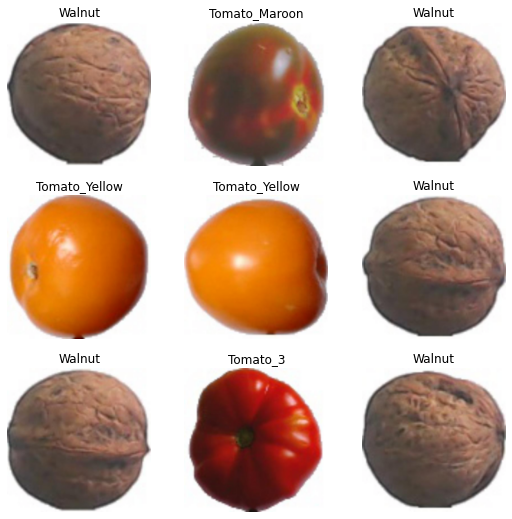

In [13]:
dls.show_batch()

# Create a model

In [14]:
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

In [15]:
model.fine_tune(
    epochs=1
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.080591,0.056408,0.975904,0.024096,09:47


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.015393,0.000003,1.000000,0.000000,14:12


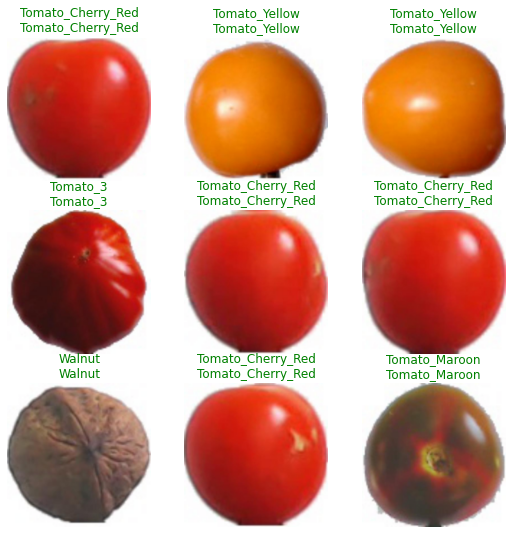

In [16]:
model.show_results()

# Save the model

In [17]:
model.export('fruit_classifier.pkl')

# Load the model

In [18]:
new_model = load_learner(f'{DATASET_PATH}/fruit_classifier.pkl')

# Predict from the loaded model

In [19]:
new_model.predict(
    item='Fruits_Dataset/train/Tomato_Yellow/6_100_jpg.rf.528e6068604a9c18e7fe0b145551d46e.jpg'
)

('Tomato_Yellow',
 TensorBase(4),
 TensorBase([2.1761e-08, 9.8123e-10, 3.1854e-14, 4.2122e-11, 1.0000e+00, 5.8297e-13]))